In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
sns.set_style('whitegrid')
rcParams['figure.dpi'] = 150
rcParams['figure.figsize'] = (4, 3)
rcParams['grid.linewidth'] = 0.5
rcParams['grid.linestyle'] = 'dashed'
rcParams['legend.fancybox'] = False
rcParams['mathtext.fontset'] = 'stix'

c6 = ['#c4bae2','#40ada6','#3c4ebf',
        '#e3a600', '#d6543a', '#edb1a3']
pretty_palette = [c6[c] for c in range(6) if c in [1,2,3,4]]

In [3]:
res_df = pd.read_csv('analysis/final_results/cell_scaling_N0_21733.759_s_0.502_I_inf_2.927_I_0_0.730.csv')

In [4]:
res_df = res_df[res_df['metric'] != 'celltype.l3']

0 PBMC
1 larry
2 merfish
3 shendure


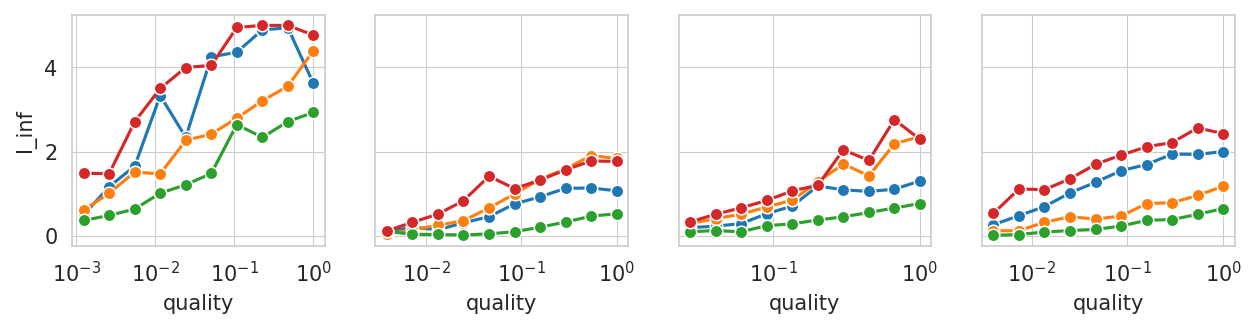

In [5]:
sns.set_style('whitegrid')

fig, axs = plt.subplots(1, 4, figsize=(10, 2), dpi=150, sharey=True)


for i, dataset in enumerate(res_df['dataset'].unique()):

    print(i, dataset)

    sns.lineplot(data=res_df[res_df['dataset'] == dataset].groupby(['quality', 'method'], as_index=False).min(numeric_only=True),
                 x='quality', y='I_inf', hue='method', ax=axs[i], marker='o',
                 legend=False)
    # log scale x
    axs[i].set_xscale('log')

In [12]:
noise_df = pd.read_csv('analysis/final_results/scaling_plots_u_bar_138.109_I_max_1.419.csv')
noise_df = noise_df[noise_df['I_max_error'] < 0.5]
noise_df = noise_df[noise_df['metric'] != 'celltype.l3']

# only max size, by dataset
noise_df = noise_df[noise_df['size'].isin(noise_df.groupby('dataset')['size'].max().values)]

noise_df.replace('protein_counts', 'Protein', inplace=True)
noise_df.replace('clone', 'Clonal', inplace=True)
noise_df.replace('author_day', 'Developmental', inplace=True)
noise_df.replace('ng_idx', 'Spatial', inplace=True)
noise_df.replace('RandomProjection', 'Rand. Proj.', inplace=True)

noise_df

,dataset,method,metric,size,fitted_u_bar,fitted_I_max,u_bar_error,I_max_error
9,shendure,Geneformer,Developmental,10000000,297.393,2.037,23.234,0.029
29,larry,Geneformer,Clonal,100000,555.203,1.310,112.062,0.063
39,merfish,Geneformer,Spatial,60000,274.496,1.549,66.400,0.106
49,PBMC,Geneformer,Protein,100000,879.137,3.783,164.122,0.090
59,shendure,PCA,Developmental,10000000,766.046,1.202,134.899,0.056
79,larry,PCA,Clonal,100000,2369.705,1.900,441.127,0.090
99,PBMC,PCA,Protein,100000,5017.339,4.096,1011.835,0.115
109,shendure,Rand. Proj.,Developmental,10000000,1358.869,0.805,171.073,0.032
129,larry,Rand. Proj.,Clonal,100000,1686.992,0.532,364.905,0.046
139,merfish,Rand. Proj.,Spatial,60000,250.534,0.696,31.950,0.034


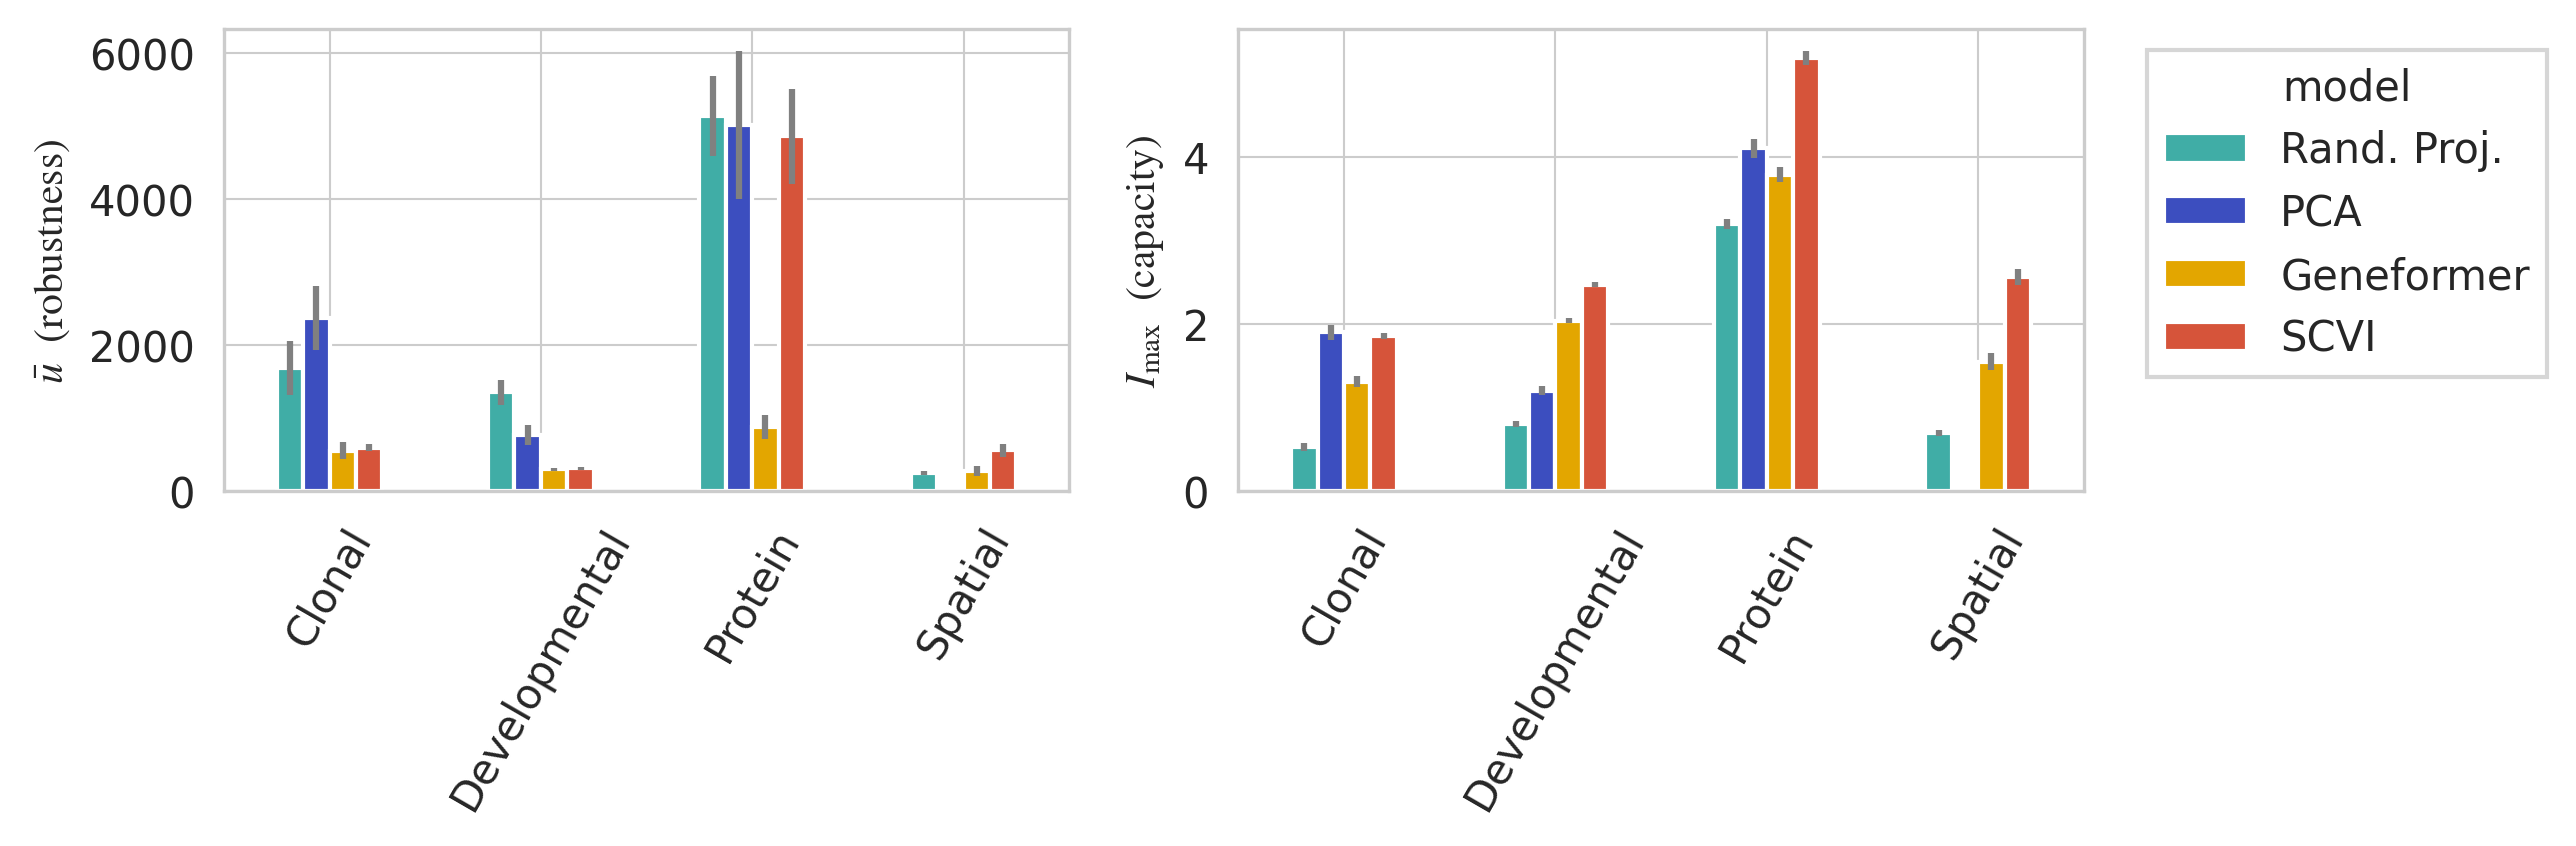

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(8, 2), dpi=300)

means = noise_df.pivot(index='metric', columns='method', values='fitted_u_bar')
errors = noise_df.pivot(index='metric', columns='method', values='u_bar_error')

hue_order = ['Rand. Proj.', 'PCA', 'Geneformer', 'SCVI']

means[hue_order].plot(kind='bar',
           yerr=errors,
           ax=axs[0],
           color=pretty_palette, 
           capsize=0,
           ecolor='grey',
           capstyle='round',
           rot=0, legend=False,)               

axs[0].set_xlabel('')
axs[0].set_ylabel(r'$\bar{u} \text{  (robustness)}$')
# xtick rotation
axs[0].tick_params(axis='x', rotation=60)

means = noise_df.pivot(index='metric', columns='method', values='fitted_I_max')
errors = noise_df.pivot(index='metric', columns='method', values='I_max_error')

means[hue_order].plot(kind='bar',
           yerr=errors,
           ax=axs[1],
           color=pretty_palette, 
           capsize=0,
           ecolor='grey',
           capstyle='round',
           rot=0)               

axs[1].set_xlabel('')
axs[1].set_ylabel(r'$I_{\max} \text{  (capacity)}$')
axs[1].legend(title='model', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].tick_params(axis='x', rotation=60)

plt.show()

In [21]:
noise_df = pd.read_csv('analysis/final_results/scaling_plots_u_bar_138.109_I_max_1.419.csv')
noise_df = noise_df[noise_df['I_max_error'] < 0.5]
noise_df = noise_df[noise_df['metric'] != 'celltype.l3']

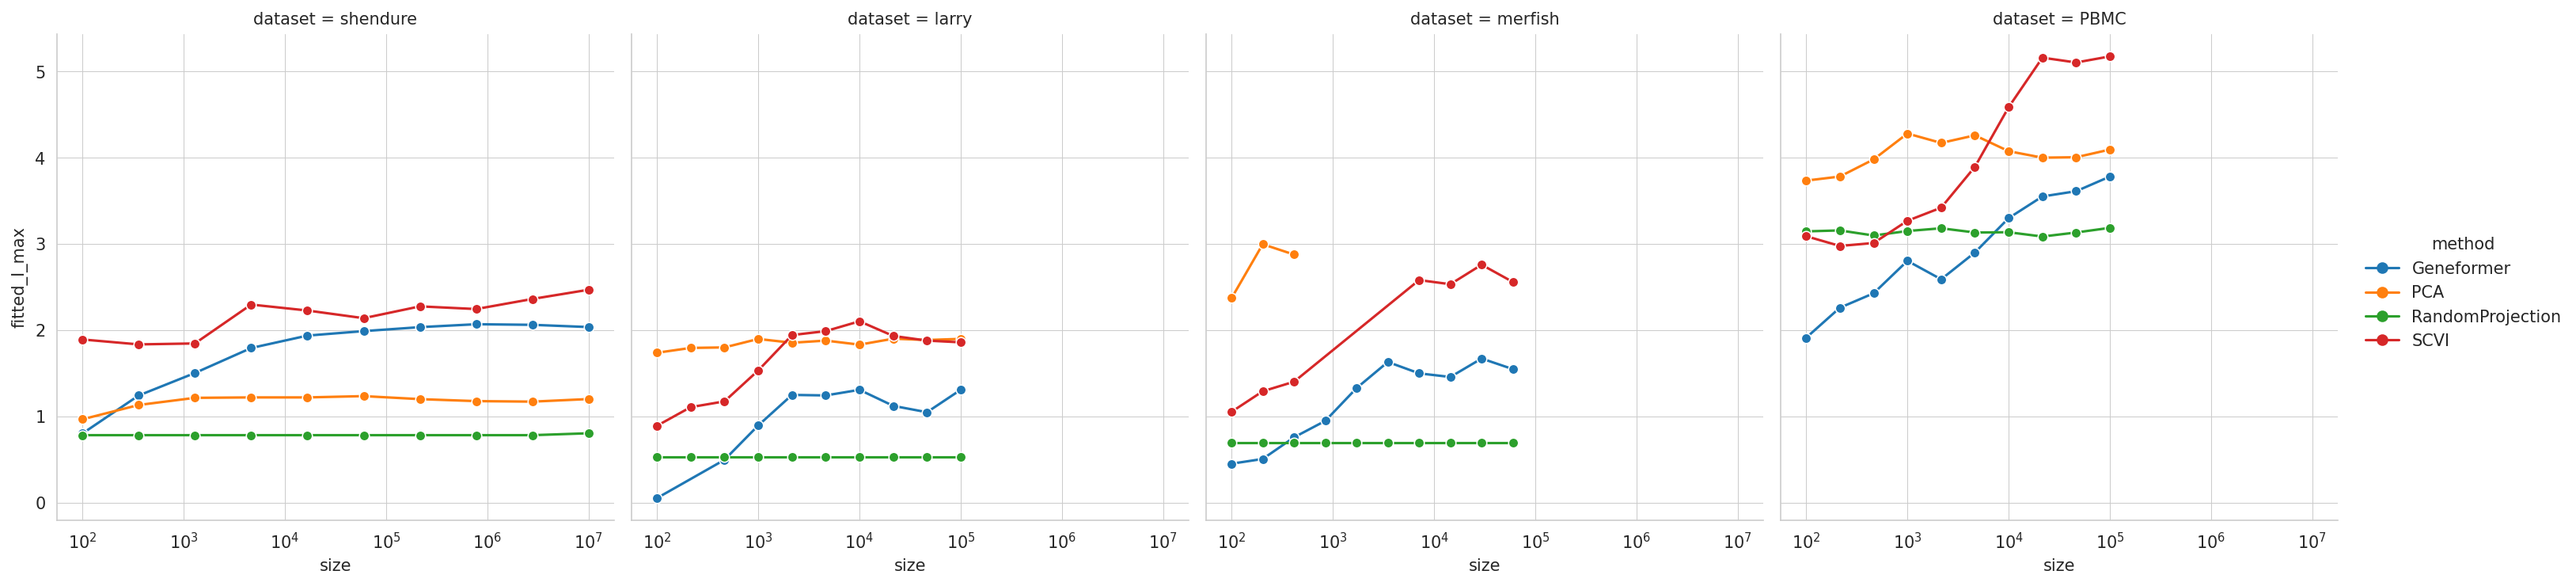

In [26]:
sns.relplot(noise_df, x='size', y='fitted_I_max', col='dataset', 
            hue='method', kind='line', marker='o')
plt.xscale('log')